In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import matplotlib.ticker as mticker
from numpy import *
from matplotlib.pyplot import *
from iris.analysis import *
from iris.coord_categorisation import *
from iris.analysis.cartography import *
from scipy.stats import *
from scipy.stats.mstats import *
from iris import *

In [4]:
fname = '/Users/alicebrindley/Dropbox/YEAR_3/Dissertation/Models/dissertation_script/IPSL/siconc_SImon_IPSL-CM6A-LR_ssp370_r1i1p1f1_gn_201501-210012-2.nc'
cube = iris.load(fname)
print(cube)

/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'siconc'
  warnings.warn(


0: cell_area / (m2)                    (-- : 332; -- : 362)
1: sea_ice_area_fraction / (%)         (time: 1032; -- : 332; -- : 362)


In [ ]:
siconc = cube[1]


In [25]:
#extract Jan and Dec to average the siconc across these months

add_month_number(siconc, 'time', name='month_number')
season_cube = siconc[np.where((siconc.coord('month_number').points == 12) |(siconc.coord('month_number')==1))]

#then to average this by each year, so that you have the December-Jan for each year add the 'season year', i.e. a number of each 'season'
add_season_year(season_cube, 'time', name='season_year')

#then average by the season year:
season_cube.aggregated_by(['season_year'], iris.analysis.MEAN)

<iris 'Cube' of sea_ice_area_fraction / (%) (time: 100; latitude: 180; longitude: 360)>

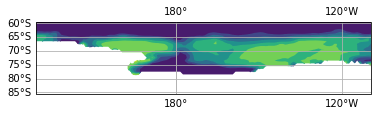

In [26]:
#identify the Ross Sea

cube3=season_cube[0,:,:]

west = -230 
east = -110 
south = -85 
north = -60
temporary_cube = cube3.intersection(longitude = (west, east)) 
regional_cube = temporary_cube.intersection(latitude = (south, north))
ax1 = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=np.round(west + (east - west)/2.0))) 
my_plot = iplt.contourf(regional_cube)
plt.gca().gridlines(draw_labels=True)

plt.show()

In [28]:
#extract the most northerly row of cells:
north_edge = regional_cube.extract(iris.Constraint(latitude=-68))

#average across this latitude to find siconc of more than 70%
north_edge_mean = north_edge.collapsed('longitude', iris.analysis.MEAN)
print(north_edge_mean.data)

71.95594200721153


In [48]:
#define siconc for polynya
polynya_threshold=regional_cube.data

#if statement to define siconc of 30% surrounded by siconc of 70+%
if polynya_threshold <= 30 and north_edge_mean >= 70:
    qplt.pcoloresh

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [46]:
#create a loop for each year to run over each season year
year_start=2015
year_end=2100

 # Iterate over all possible latitude longitude slices.
for season_cube in regional_year.slices(["latitude", "longitude"]):
    
    if polynya_threshold <= 30 and north_edge_mean >= 70:
        plt.subplot
    else:
        print('no polynya')

CoordinateNotFoundError: 'Expected to find exactly 1 season_cube coordinate, but found none.'

In [31]:
#calculate the area of the ouput (polynya)
#result being the output from previous cell which doesn't run

result.coord('grid_latitude').guess_bounds()
result.coord('grid_longitude').guess_bounds()
grid_areas = iris.analysis.cartography.area_weights(cube)

cube_vf = result.collapsed(['grid_longitude', 'grid_latitude'], iris.analysis.MEAN, weights=grid_areas)

NameError: name 'result' is not defined